# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Get current date
current_date = datetime.date.today()
current_date =  current_date.strftime("%x")



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    city = citipy.nearest_city(lat_lngs[0], lat_lngs[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['albany',
 'sentyabrskiy',
 'poquoson',
 'waingapu',
 'ushuaia',
 'ponta do sol',
 'gazojak',
 'busselton',
 'punta cardon',
 'puerto ayora',
 'hobart',
 'yatou',
 'khani',
 'barrow',
 'saskylakh',
 'guerrero negro',
 'rawson',
 'umzimvubu',
 'lethem',
 'rikitea',
 'talnakh',
 'midland',
 'boksitogorsk',
 'port blair',
 'clifton springs',
 'florence',
 'kendari',
 'mahebourg',
 'qaanaaq',
 'vaini',
 'arraial do cabo',
 'hokitika',
 'rosario',
 'luderitz',
 'tigil',
 'vao',
 'kaitangata',
 'kruisfontein',
 'mataura',
 'upernavik',
 'thompson',
 'ilulissat',
 'necochea',
 'goundam',
 'kapaa',
 'cape town',
 'tuktoyaktuk',
 'ahipara',
 'deputatskiy',
 'rio cuarto',
 'santa vitoria do palmar',
 'hilo',
 'matamoros',
 'baykit',
 'dano',
 'sorong',
 'waipawa',
 'erenhot',
 'hermanus',
 'salisbury',
 'dingle',
 'georgetown',
 'pacific grove',
 'atuona',
 'platanos',
 'itarema',
 'taldan',
 'honiara',
 'saint george',
 'hasaki',
 'komsomolskiy',
 'khatanga',
 'nanortalik',
 'libreville',
 'la

In [3]:
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
unit="imperial"

cloud_l = []
country_l = []
dates_l = []
humi_l = []
maxtemp_l = []
windspeed_l =[]
lat_l =[]
lon_l =[]

#={city name}&appid={your api key}"
print("Beginning data retrieval")

for x in range(len(cities)):
    try:
        print(f"Processing record {x} of set 1 | {cities[x]}")
        
        base_url = url+cities[x]+"&appid="+weather_api_key+"&units="+unit
        response= requests.get(base_url)
        data=response.json()
        
        latitude = data['coord']['lat']
        lat_l.append(latitude)
        
        longitude = data['coord']['lon']
        lon_l.append(longitude)
        
        cloud = data['clouds']['all']
        cloud_l.append(cloud)
        
        country=data['sys']['country']
        country_l.append(country)
        
        dates=data['dt']
        dates_l.append(dates)
        
        humi=data['main']['humidity'] 
        humi_l.append(humi)
        
        maxtemp=data['main']['temp_max']
        maxtemp_l.append(maxtemp)
        
        windspeed=data['wind']['speed']
        windspeed_l.append(windspeed)

    except:
        print("Data not found.Adding NULL values")
        
        latitude = np.nan
        lat_l.append(latitude)
        
        longitude = np.nan
        lon_l.append(longitude)
        
        cloud = np.nan
        cloud_l.append(cloud)
        
        country=np.nan
        country_l.append(country)
        
        dates=np.nan
        dates_l.append(dates)
        
        humi=np.nan 
        humi_l.append(humi)
        
        maxtemp=np.nan
        maxtemp_l.append(maxtemp)
        
        windspeed=np.nan
        windspeed_l.append(windspeed)
    


Beginning data retrieval
Processing record 0 of set 1 | albany
Processing record 1 of set 1 | sentyabrskiy
Data not found.Adding NULL values
Processing record 2 of set 1 | poquoson
Processing record 3 of set 1 | waingapu
Processing record 4 of set 1 | ushuaia
Processing record 5 of set 1 | ponta do sol
Processing record 6 of set 1 | gazojak
Processing record 7 of set 1 | busselton
Processing record 8 of set 1 | punta cardon
Processing record 9 of set 1 | puerto ayora
Processing record 10 of set 1 | hobart
Processing record 11 of set 1 | yatou
Processing record 12 of set 1 | khani
Processing record 13 of set 1 | barrow
Processing record 14 of set 1 | saskylakh
Processing record 15 of set 1 | guerrero negro
Processing record 16 of set 1 | rawson
Processing record 17 of set 1 | umzimvubu
Data not found.Adding NULL values
Processing record 18 of set 1 | lethem
Processing record 19 of set 1 | rikitea
Processing record 20 of set 1 | talnakh
Processing record 21 of set 1 | midland
Processing 

Processing record 184 of set 1 | codrington
Processing record 185 of set 1 | hailar
Processing record 186 of set 1 | ugoofaaru
Processing record 187 of set 1 | gorele
Processing record 188 of set 1 | moree
Processing record 189 of set 1 | san luis
Processing record 190 of set 1 | xifeng
Processing record 191 of set 1 | conversion
Processing record 192 of set 1 | vorotynets
Processing record 193 of set 1 | arinos
Processing record 194 of set 1 | nizhneyansk
Data not found.Adding NULL values
Processing record 195 of set 1 | muros
Processing record 196 of set 1 | adrar
Processing record 197 of set 1 | bethel
Processing record 198 of set 1 | naryan-mar
Processing record 199 of set 1 | port alfred
Processing record 200 of set 1 | rio claro
Processing record 201 of set 1 | akureyri
Processing record 202 of set 1 | verkhnetulomskiy
Processing record 203 of set 1 | samusu
Data not found.Adding NULL values
Processing record 204 of set 1 | sorvag
Data not found.Adding NULL values
Processing reco

Processing record 364 of set 1 | marsh harbour
Processing record 365 of set 1 | evans
Processing record 366 of set 1 | yabelo
Processing record 367 of set 1 | arzgir
Processing record 368 of set 1 | bereda
Processing record 369 of set 1 | ostrovnoy
Processing record 370 of set 1 | navrongo
Processing record 371 of set 1 | san quintin
Processing record 372 of set 1 | belushya guba
Data not found.Adding NULL values
Processing record 373 of set 1 | devarkonda
Processing record 374 of set 1 | cidreira
Processing record 375 of set 1 | shaowu
Processing record 376 of set 1 | ayna
Processing record 377 of set 1 | mogzon
Processing record 378 of set 1 | leningradskiy
Processing record 379 of set 1 | kavieng
Processing record 380 of set 1 | bud
Processing record 381 of set 1 | grand-lahou
Processing record 382 of set 1 | kungurtug
Processing record 383 of set 1 | belyy yar
Processing record 384 of set 1 | kemijarvi
Processing record 385 of set 1 | gambo
Processing record 386 of set 1 | atar
Pro

Processing record 544 of set 1 | zhigansk
Processing record 545 of set 1 | ust-tsilma
Processing record 546 of set 1 | urubicha
Processing record 547 of set 1 | regina
Processing record 548 of set 1 | khurba
Processing record 549 of set 1 | buhovo
Processing record 550 of set 1 | horki
Processing record 551 of set 1 | prizren
Processing record 552 of set 1 | bundaberg
Processing record 553 of set 1 | quatre cocos
Processing record 554 of set 1 | kapoeta
Processing record 555 of set 1 | ponta delgada
Processing record 556 of set 1 | coruripe
Processing record 557 of set 1 | ruteng
Processing record 558 of set 1 | vanavara
Processing record 559 of set 1 | wucheng
Processing record 560 of set 1 | anloga
Processing record 561 of set 1 | eureka
Processing record 562 of set 1 | neryungri
Processing record 563 of set 1 | zhanaozen
Processing record 564 of set 1 | bernalda
Processing record 565 of set 1 | usinsk
Processing record 566 of set 1 | limbang
Processing record 567 of set 1 | nanakuli

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
dis_df = {"City" : cities,
          "Cloudiness" : cloud_l,
           "Country" : country_l,
          "Date" : dates_l,
           "Humidity" : humi_l,
          "Lat" : lat_l,
         "Lng" : lon_l,
         "Max Temp" : maxtemp_l,
         "Wind Speed" : windspeed_l
        }


dis_df_new = pd.DataFrame(dis_df)
dis_df_new.head(25)



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75.0,US,1.586624e+09,36.0,42.60,-73.97,48.99,20.80
1,sentyabrskiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,poquoson,1.0,US,1.586625e+09,33.0,37.12,-76.35,60.01,13.87
3,waingapu,27.0,ID,1.586625e+09,78.0,-9.66,120.26,77.63,5.97
4,ushuaia,40.0,AR,1.586624e+09,49.0,-54.80,-68.30,48.20,25.28
5,ponta do sol,75.0,PT,1.586625e+09,68.0,32.67,-17.10,64.40,8.05
6,gazojak,62.0,TM,1.586625e+09,27.0,41.19,61.40,64.90,9.31
7,busselton,100.0,AU,1.586625e+09,51.0,-33.65,115.33,69.01,6.13
8,punta cardon,38.0,VE,1.586625e+09,73.0,11.66,-70.22,83.48,26.02
9,puerto ayora,75.0,EC,1.586625e+09,74.0,-0.74,-90.35,84.99,9.17


In [6]:
dis_df_new.count()

City          621
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [7]:
df= dis_df_new.dropna(how='any')
#dis_df_new.count()
df
#df.count()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75.0,US,1.586624e+09,36.0,42.60,-73.97,48.99,20.80
2,poquoson,1.0,US,1.586625e+09,33.0,37.12,-76.35,60.01,13.87
3,waingapu,27.0,ID,1.586625e+09,78.0,-9.66,120.26,77.63,5.97
4,ushuaia,40.0,AR,1.586624e+09,49.0,-54.80,-68.30,48.20,25.28
5,ponta do sol,75.0,PT,1.586625e+09,68.0,32.67,-17.10,64.40,8.05
...,...,...,...,...,...,...,...,...,...
616,pimenteiras,89.0,BR,1.586625e+09,73.0,-6.25,-41.42,83.86,3.27
617,mega,26.0,ET,1.586625e+09,52.0,4.05,38.30,65.07,11.18
618,ipixuna,75.0,BR,1.586625e+09,66.0,-1.76,-48.80,87.80,5.82
619,aykhal,88.0,RU,1.586625e+09,58.0,66.00,111.50,30.20,6.71


In [8]:
df.to_csv( path_or_buf=output_data_file,sep=',',index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

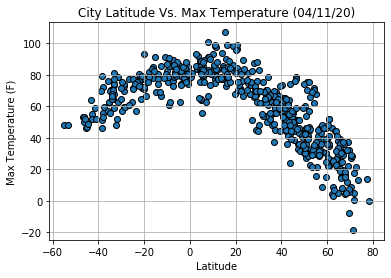

In [9]:
x_axis = df['Lat']
y_axis = df['Max Temp']
plt.scatter(x_axis,y_axis,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude Vs. Max Temperature (" +str(current_date) + ")")
plt.grid()
#plt.xlim(min(x_axis)-10,max(x_axis)+10)

plt.savefig("Images/CLVT.png")
plt.show()

The above code creates a scatter plot to analyse the relation between City Latitude and the Maximum temperature of a city.
As the latitude increases the maximum temperature decreases.

#### Latitude vs. Humidity Plot

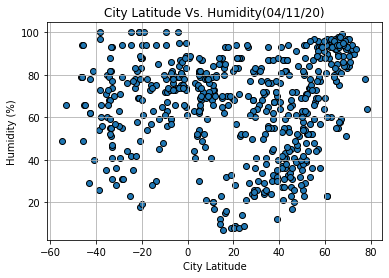

In [10]:
x_axis=df['Lat']
y_axis=df['Humidity']
plt.scatter(x_axis,y_axis,edgecolor='black')
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity(" +str(current_date) + ")")
plt.grid()
plt.savefig("Images/CLVH.png")
plt.show()

The above code creates a scatter plot to analyse the relation between City Latitude and humidity of a city.
As the latitude increases, it becomes more humid.

#### Latitude vs. Cloudiness Plot

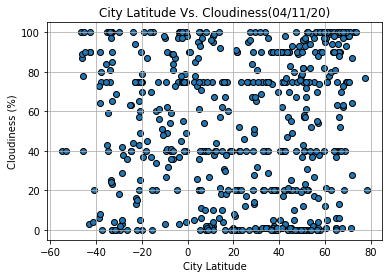

In [11]:
x_axis=df['Lat']
y_axis=df['Cloudiness']
plt.scatter(x_axis,y_axis,edgecolor='black')
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness(" +str(current_date) + ")")
plt.grid()
plt.savefig("Images/CLVC.png")
plt.show()

The above code creates a scatter plot to analyse the relation between City Latitude and cloudiness of a city.
There seems to be no big relation between the two.

#### Latitude vs. Wind Speed Plot

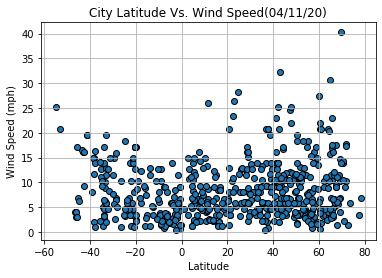

In [12]:
x_axis=df['Lat']
y_axis=df['Wind Speed']
plt.scatter(x_axis,y_axis,edgecolor='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude Vs. Wind Speed(" +str(current_date) + ")")
plt.grid()
plt.savefig("Images/CLVWS.png")
plt.show()

The above code creates a scatter plot to analyse the relation between City Latitude and wind speed of a city.
There seems to be no relation between the both. There is no drastic change in wind speed as the latitude increases.

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots

#Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):


In [13]:
# Create Northern and Southern Hemisphere DataFrames

north_df = df.loc[(df['Lat'] >= 0),: ]
north_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,albany,75.0,US,1.586624e+09,36.0,42.60,-73.97,48.99,20.80
2,poquoson,1.0,US,1.586625e+09,33.0,37.12,-76.35,60.01,13.87
5,ponta do sol,75.0,PT,1.586625e+09,68.0,32.67,-17.10,64.40,8.05
6,gazojak,62.0,TM,1.586625e+09,27.0,41.19,61.40,64.90,9.31
8,punta cardon,38.0,VE,1.586625e+09,73.0,11.66,-70.22,83.48,26.02
...,...,...,...,...,...,...,...,...,...
611,alugan,40.0,PH,1.586625e+09,79.0,12.22,125.48,77.47,2.46
613,bolo,6.0,PH,1.586625e+09,88.0,13.79,120.98,78.01,2.46
615,okhotsk,97.0,RU,1.586625e+09,96.0,59.38,143.30,24.75,1.70
617,mega,26.0,ET,1.586625e+09,52.0,4.05,38.30,65.07,11.18


In [14]:
south_df = df.loc[(df['Lat'] < 0),: ]
south_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
3,waingapu,27.0,ID,1.586625e+09,78.0,-9.66,120.26,77.63,5.97
4,ushuaia,40.0,AR,1.586624e+09,49.0,-54.80,-68.30,48.20,25.28
7,busselton,100.0,AU,1.586625e+09,51.0,-33.65,115.33,69.01,6.13
9,puerto ayora,75.0,EC,1.586625e+09,74.0,-0.74,-90.35,84.99,9.17
10,hobart,90.0,AU,1.586624e+09,62.0,-42.88,147.33,51.80,16.11
...,...,...,...,...,...,...,...,...,...
612,general pico,84.0,AR,1.586625e+09,35.0,-35.66,-63.76,76.05,14.05
614,vicosa,60.0,BR,1.586624e+09,89.0,-20.75,-42.88,79.00,1.01
616,pimenteiras,89.0,BR,1.586625e+09,73.0,-6.25,-41.42,83.86,3.27
618,ipixuna,75.0,BR,1.586625e+09,66.0,-1.76,-48.80,87.80,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
def funlinreg (x_values,y_values,labelx,labely,titles):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(x_values,y_values)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(titles)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values),min(y_values)),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    return(fig)

The r-squared is: -0.8714836075395231


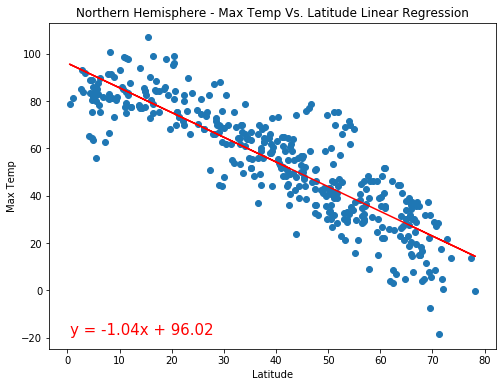

In [16]:

fig1=funlinreg(north_df['Lat'],north_df['Max Temp'],'Latitude','Max Temp','Northern Hemisphere - Max Temp Vs. Latitude Linear Regression')
fig1.savefig("Images/NH-CLVT.png")


The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Maximum Tempearture of cities in Northern Hemisphere alone(greater than or equal to 0 degrees latitude). There is a negative corelation between the two factors.The maximum temperature decreases as the latitude increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7595753668372166


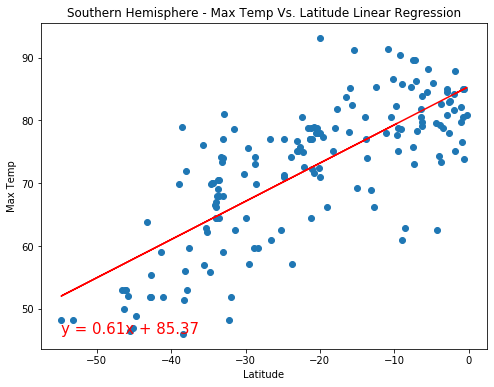

In [17]:

fig1=funlinreg(south_df['Lat'],south_df['Max Temp'],'Latitude','Max Temp','Southern Hemisphere - Max Temp Vs. Latitude Linear Regression')
fig1.savefig("Images/SH-CLVT.png")


The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Maximum Tempearture of cities in Southern Hemisphere alone(less than 0 degrees latitude). There is a positive corelation between the two factors.The maximum temperature increases as the latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2706976781283922


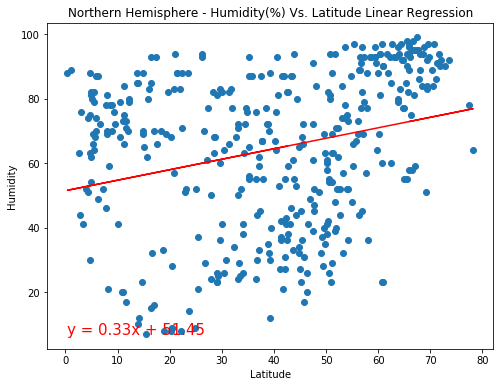

In [18]:

fig1 = funlinreg(north_df['Lat'],north_df['Humidity'],'Latitude','Humidity','Northern Hemisphere - Humidity(%) Vs. Latitude Linear Regression')
fig1.savefig("Images/NH-CLVH.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Humidity of cities in Northern Hemisphere alone(greater than or equal to 0 degrees latitude). There is no significant corelation between the two factors.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23908227640928476


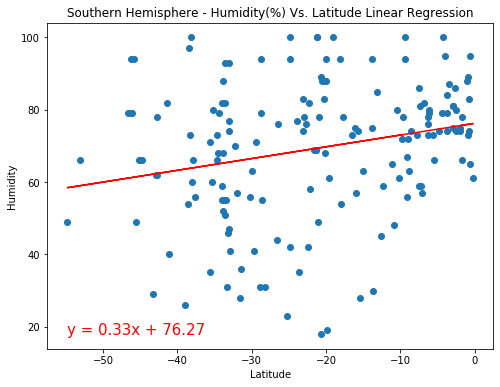

In [19]:

fig1=funlinreg(south_df['Lat'],south_df['Humidity'],'Latitude','Humidity','Southern Hemisphere - Humidity(%) Vs. Latitude Linear Regression')
fig1.savefig("Images/SH-CLVH.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Humidity of cities in Southern Hemisphere alone(less than 0 degrees latitude). There is no significant corelation between the two factors.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20310731431655346


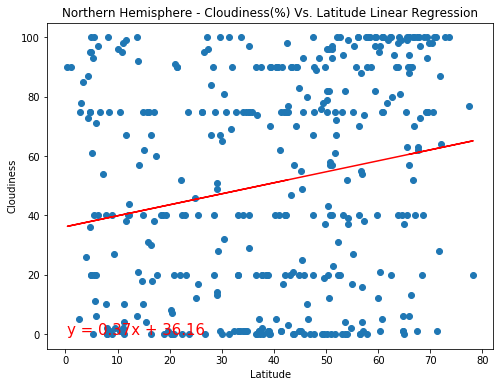

In [20]:

fig1=funlinreg(north_df['Lat'],north_df['Cloudiness'],'Latitude','Cloudiness','Northern Hemisphere - Cloudiness(%) Vs. Latitude Linear Regression')
fig1.savefig("Images/NH-CLVC.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Cloudiness of cities in Northern Hemisphere alone(greater than or equal to 0 degrees latitude). There is no significant corelation between the two factors.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04043479710077005


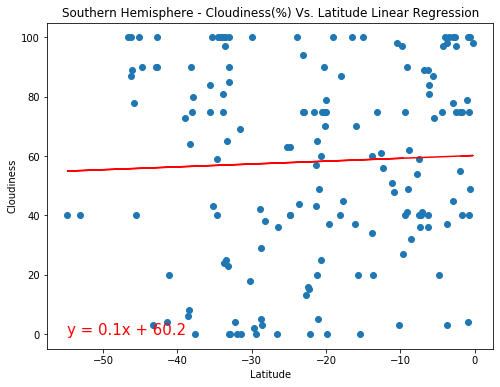

In [21]:

fig1=funlinreg(south_df['Lat'],south_df['Cloudiness'],'Latitude','Cloudiness','Southern Hemisphere - Cloudiness(%) Vs. Latitude Linear Regression')
fig1.savefig("Images/SH-CLVC.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Cloudiness of cities in Southern Hemisphere alone(less than 0 degrees latitude). There is no significant corelation betwen the two factors.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12891692167701452


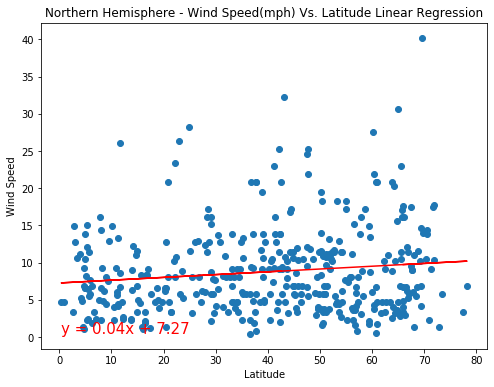

In [22]:

fig1=funlinreg(north_df['Lat'],north_df['Wind Speed'],'Latitude','Wind Speed','Northern Hemisphere - Wind Speed(mph) Vs. Latitude Linear Regression')
fig1.savefig("Images/NH-CLVWS.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Wind Speed of cities in Northern Hemisphere alone(greater than or equal to 0 degrees latitude). There is no significant corelation between the two factors.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2955799840808985


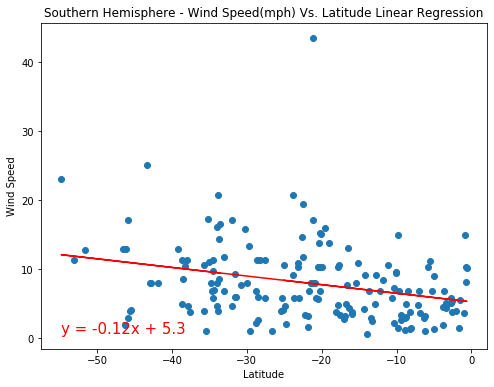

In [24]:

fig1=funlinreg(south_df['Lat'],south_df['Wind Speed'],'Latitude','Wind Speed','Southern Hemisphere - Wind Speed(mph) Vs. Latitude Linear Regression')
fig1.savefig("Images/SH-CLVWS.png")

The above code calls a function to generate a scatter plot to see if there is a trend between Latitude and Wind Speed of cities in Southern Hemisphere alone(less than 0 degrees latitude). There is a negative but not significant corelation between the two factors.